In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Jan 27 2021 16:36:49CET



## Load of the test data

In [3]:
from process import loaddata
regr_data = loaddata("../data/regression/100.csv")
class_data = loaddata("../data/classifier/100.csv")

In [4]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]

In [5]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

In [6]:
xc_test.shape

(124064, 10)

In [7]:
xr_test.shape

(62032, 6)

## Model Build

In [8]:
from tensorflow import keras 

In [9]:
model_regr = keras.models.load_model('../models/regression/large_mse250.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

## Test of the Classification NN

In [10]:
model_class.fit(xc_test, yc_test)

3877/3877 [==============================] - 3s 684us/step - loss: 0.1811 - accuracy: 0.9382


## Test of the Regression NN

In [11]:
model_regr.fit(xr_test, yr_test)

1939/1939 [==============================] - 3s 1ms/step - loss: 4.7268e-06 - mae: 0.0017


## Test spectrum

In [12]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [13]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

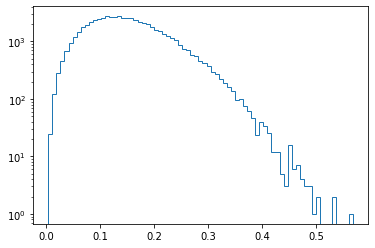

In [14]:
energy_spectrum(final_e, 75)

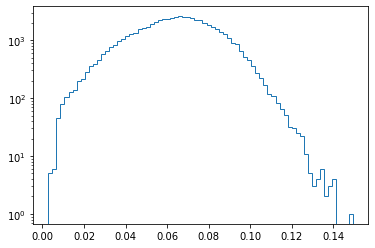

In [15]:
energy_spectrum(final_p, 75)

In [16]:
photon_final_nn = []
threshold = 0.5
for i, x in enumerate(xc_test[:200]):
    if i%100 == 0:
        print("{}%".format(i/len(xc_test) * 100))
    x = np.array([x])
    classification = model_class.predict(np.stack(x))
    if classification >= threshold:
        regr_x = np.array([x[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
0.08060355945318545%


In [17]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = int(0.05*len(xc_test))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc_test[:num]):
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))
    bar.update(i+1)
bar.finish()

[================================================================] 100% of 6203


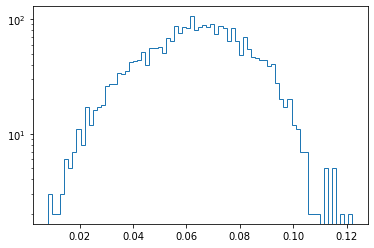

In [18]:
energy_spectrum(photon_final_nn, 75)

In [19]:
photon_final_nn

[0.034907296,
 0.04905463,
 0.05846989,
 0.04304211,
 0.035764873,
 0.0727655,
 0.062452193,
 0.079499006,
 0.1121375,
 0.05683261,
 0.045937866,
 0.05128983,
 0.08218238,
 0.057861287,
 0.038418595,
 0.07638636,
 0.09011308,
 0.053186093,
 0.07192461,
 0.07546655,
 0.038136445,
 0.087316535,
 0.079358555,
 0.06596263,
 0.08109002,
 0.07191963,
 0.04552672,
 0.07553766,
 0.037673574,
 0.039604533,
 0.061014142,
 0.09780629,
 0.0662394,
 0.062271565,
 0.062124982,
 0.0770756,
 0.08895412,
 0.08979464,
 0.043444447,
 0.07774765,
 0.08596103,
 0.065608375,
 0.08405693,
 0.078330874,
 0.08260547,
 0.07330142,
 0.07622972,
 0.07143946,
 0.059645884,
 0.08643876,
 0.024503198,
 0.06701902,
 0.09333048,
 0.07780509,
 0.0640876,
 0.06888966,
 0.04957041,
 0.09260487,
 0.050082162,
 0.0422147,
 0.032430895,
 0.0594248,
 0.06609501,
 0.045708615,
 0.0649461,
 0.022423223,
 0.08718548,
 0.031098504,
 0.091998436,
 0.076146565,
 0.06841583,
 0.046747275,
 0.070608206,
 0.06495727,
 0.09439724,
 0.

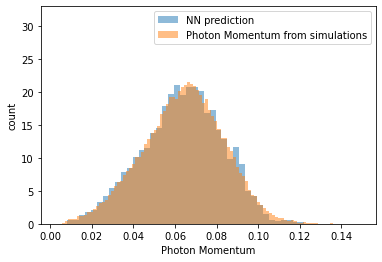

In [20]:
plt.hist(photon_final_nn, 40, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 33))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


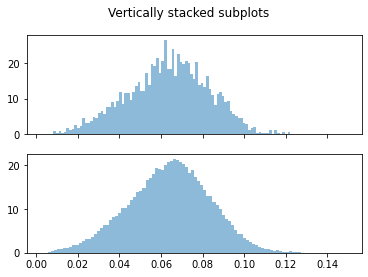

In [21]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 90, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()